In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
rng = np.random.default_rng()  # Random numbers generator

def beta_rvs(mu: float, N: int, sigma = 0.1):
    """ sigma in (0, 0.25)
    """
    a = ((1 - mu) / sigma ** 2 - 1 / mu) * mu ** 2
    b =  a * (1 / mu - 1)
    res = rng.beta(a, b, size=N)
    return res

In [3]:
N = 1000
correct_ratio = 0.3
correct_agreement = 0.15
wrong_ratio = 1 - correct_ratio
wrong_agreement = 0.9

n_correct = rng.binomial(1000, correct_ratio)
n_wrong = N - n_correct

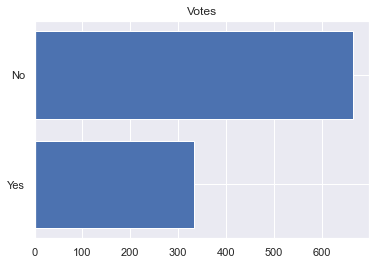

In [4]:
plt.barh(['Yes', 'No'], [n_correct, n_wrong])
plt.title("Votes")
plt.show()

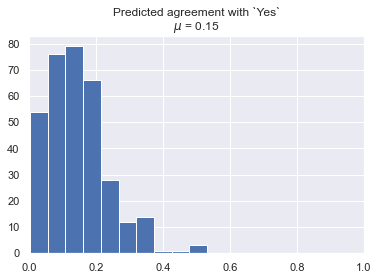

In [5]:
pred_correct = beta_rvs(correct_agreement, n_correct)
plt.hist(pred_correct)
plt.title(f"Predicted agreement with `Yes`\n$\\mu$ = {pred_correct.mean():.2f}")
plt.xlim(0, 1)
plt.show()

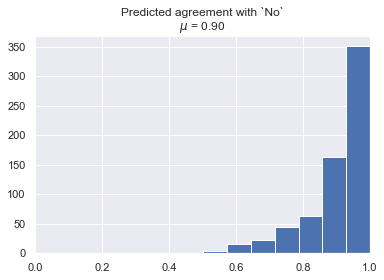

In [6]:
pred_wrong = beta_rvs(wrong_agreement, n_wrong)
plt.hist(pred_wrong)
plt.title(f"Predicted agreement with `No`\n$\\mu$ = {pred_wrong.mean():.2f}")
plt.xlim(0, 1)
plt.show()

In [7]:
expected_yes = ((1 - pred_wrong).sum() + pred_correct.sum()) / N
obs_yes = n_correct / N
expected_no = ((1 - pred_correct).sum() + pred_wrong.sum()) / N
obs_no = n_wrong / N

diff_dict = {
    "Yes" : obs_yes - expected_yes,
    "No" : obs_no - expected_no
}

spa = max(diff_dict, key=diff_dict.get)
print(f"Suprisngly Popular answer is `{spa}`.")

Suprisngly Popular answer is `Yes`.
